#### Задача 1 (5 баллов).

Напишите программу для конвертации форматов картинок. Программа должна уметь:

- спрашивать у человека путь к картинке или папке и конвертировать либо картинку, либо все картинки указанного формата в папке
- спрашивать у человека исходный формат (если указывается папка для конвертации)
- спрашивать у человека целевой формат для конвертации
- если целевым форматом указывается ico, нужно автоматически уменьшать картинки до 32х32
- поддерживаться должны форматы jpeg, png, ico, webp.
- новая сконвертированная картинка должна получать такое же имя, как исходная, но другое расширение.
- (на бонусный балл) добавить argparse и возможность запускать ваш скрипт из командной строки с указанными параметрами. Добавьте еще аргумент -h и строчку с пояснением, какие вы ждете параметры: -h должен выводить эту строчку.
- (на бонусный балл) добавьте поддержку конвертации avif.
- (на бонусный балл) добавьте в argparse опцию -d, чтобы удалять исходную картинку.

In [ ]:
import os
from PIL import Image

In [ ]:
def convert_image(input_path, output_format): # функция для конвертации картинки
  img = Image.open(input_path)
  ext = '.' + output_format
  new_path = input_path.replace(os.path.splitext(input_path)[1], ext)
  if output_format == 'ico':
    img = img.resize((32, 32))
  img.save(new_path, format=output_format)

def process_directory(directory, input_format, output_format): # функция для всех картинок указанного формата в папке
  for file in os.listdir(directory):
    if file.endswith('.' + input_format):
      full_path = os.path.join(directory, file)
      convert_image(full_path, output_format)

def myimageconverter(input_path, output_format, input_format=None):
  if os.path.exists(input_path): # проверяем, существует ли такой путь
    if os.path.isdir(input_path): # если да, то смотрим, это путь к файлу или к папке
      if input_format:
        process_directory(input_path, input_format, output_format)
      else:
        print('Input format needed.')
    else:
      convert_image(input_path, output_format)
  else:
    print('No such file or directory.')

In [ ]:
myimageconverter('/content/witcher.jpg', 'ico')
myimageconverter('/content', 'webp', 'jpg')

#### Задача 2 (3 балла).

Выберите любую фентези-карту (можно из игрушки, можно из книжки) и сделайте из нее интерактивную карту в питоне (придется немножко погуглить, как добавить свое изображение в качестве карты). Нанесите на нее минимум два маркера. Эту задачу можно сделать в колабе, но пришлите тогда и свой файл для карты :)

In [ ]:
pip install folium==0.14

In [ ]:
import folium
from folium.plugins import MousePosition

In [ ]:
witcher_map = folium.Map(crs='Simple', zoom_start=2, tiles=None)

img = folium.raster_layers.ImageOverlay(
      name="Witcher Map",
      image="/content/witcher-map.jpg",
        bounds=[[-200, -150], [200, 150]],
        opacity=1,
        interactive=True,
        cross_origin=False,
        zindex=1,
)

img.add_to(witcher_map)
folium.LayerControl().add_to(witcher_map)

# добавляю мышку, чтобы дальше добавлять маркеры по координатам

formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

witcher_map.add_child(mouse_position)

In [ ]:
# добавляю маркеры

folium.Marker([51.30223, -17.86594],
              popup='<i>The capital city of Redania</i>',
              tooltip='Tretogor',
              icon=folium.CustomIcon('/content/Redania.svg', icon_size=(30, 35))
             ).add_to(witcher_map)

folium.Marker([-87.43089, -52.74151],
              popup='<i>The capital city of Cintra</i>',
              tooltip='Cintra',
              icon=folium.CustomIcon('/content/Cintra.svg', icon_size=(30, 35))
             ).add_to(witcher_map)

folium.Marker([113.52698, 48.70206],
              popup='<i>The capital city of Kaedwen</i>',
              tooltip='Ard Carraigh',
              icon=folium.CustomIcon('/content/Kaedwen.svg', icon_size=(30, 35))
             ).add_to(witcher_map)

folium.Marker([-10.78691, 57.31983],
              popup='<i>The capital city of Aedirn</i>',
              tooltip='Vengerberg',
              icon=folium.CustomIcon('/content/Aedirn.svg', icon_size=(30, 35))
             ).add_to(witcher_map)

folium.Marker([13.93156, -16.17997],
              popup='<i>The capital city of Temeria</i>',
              tooltip='Vizima',
              icon=folium.CustomIcon('/content/Temeria.svg', icon_size=(30, 35))
             ).add_to(witcher_map)

folium.Marker([145.89696, 95.68063],
              popup='<i>An old keep where the witchers used to be trained</i>',
              tooltip='Kaer Morhen',
              icon=folium.CustomIcon('/content/witcher.jpg', icon_size=(30, 35))
             ).add_to(witcher_map)

folium.Marker([41.17752, -63.08703],
              popup='<i>A magical academy for young ladies</i>',
              tooltip='Aretuza',
              icon=folium.CustomIcon('/content/Tissaia.jpg', icon_size=(30, 35))
             ).add_to(witcher_map)


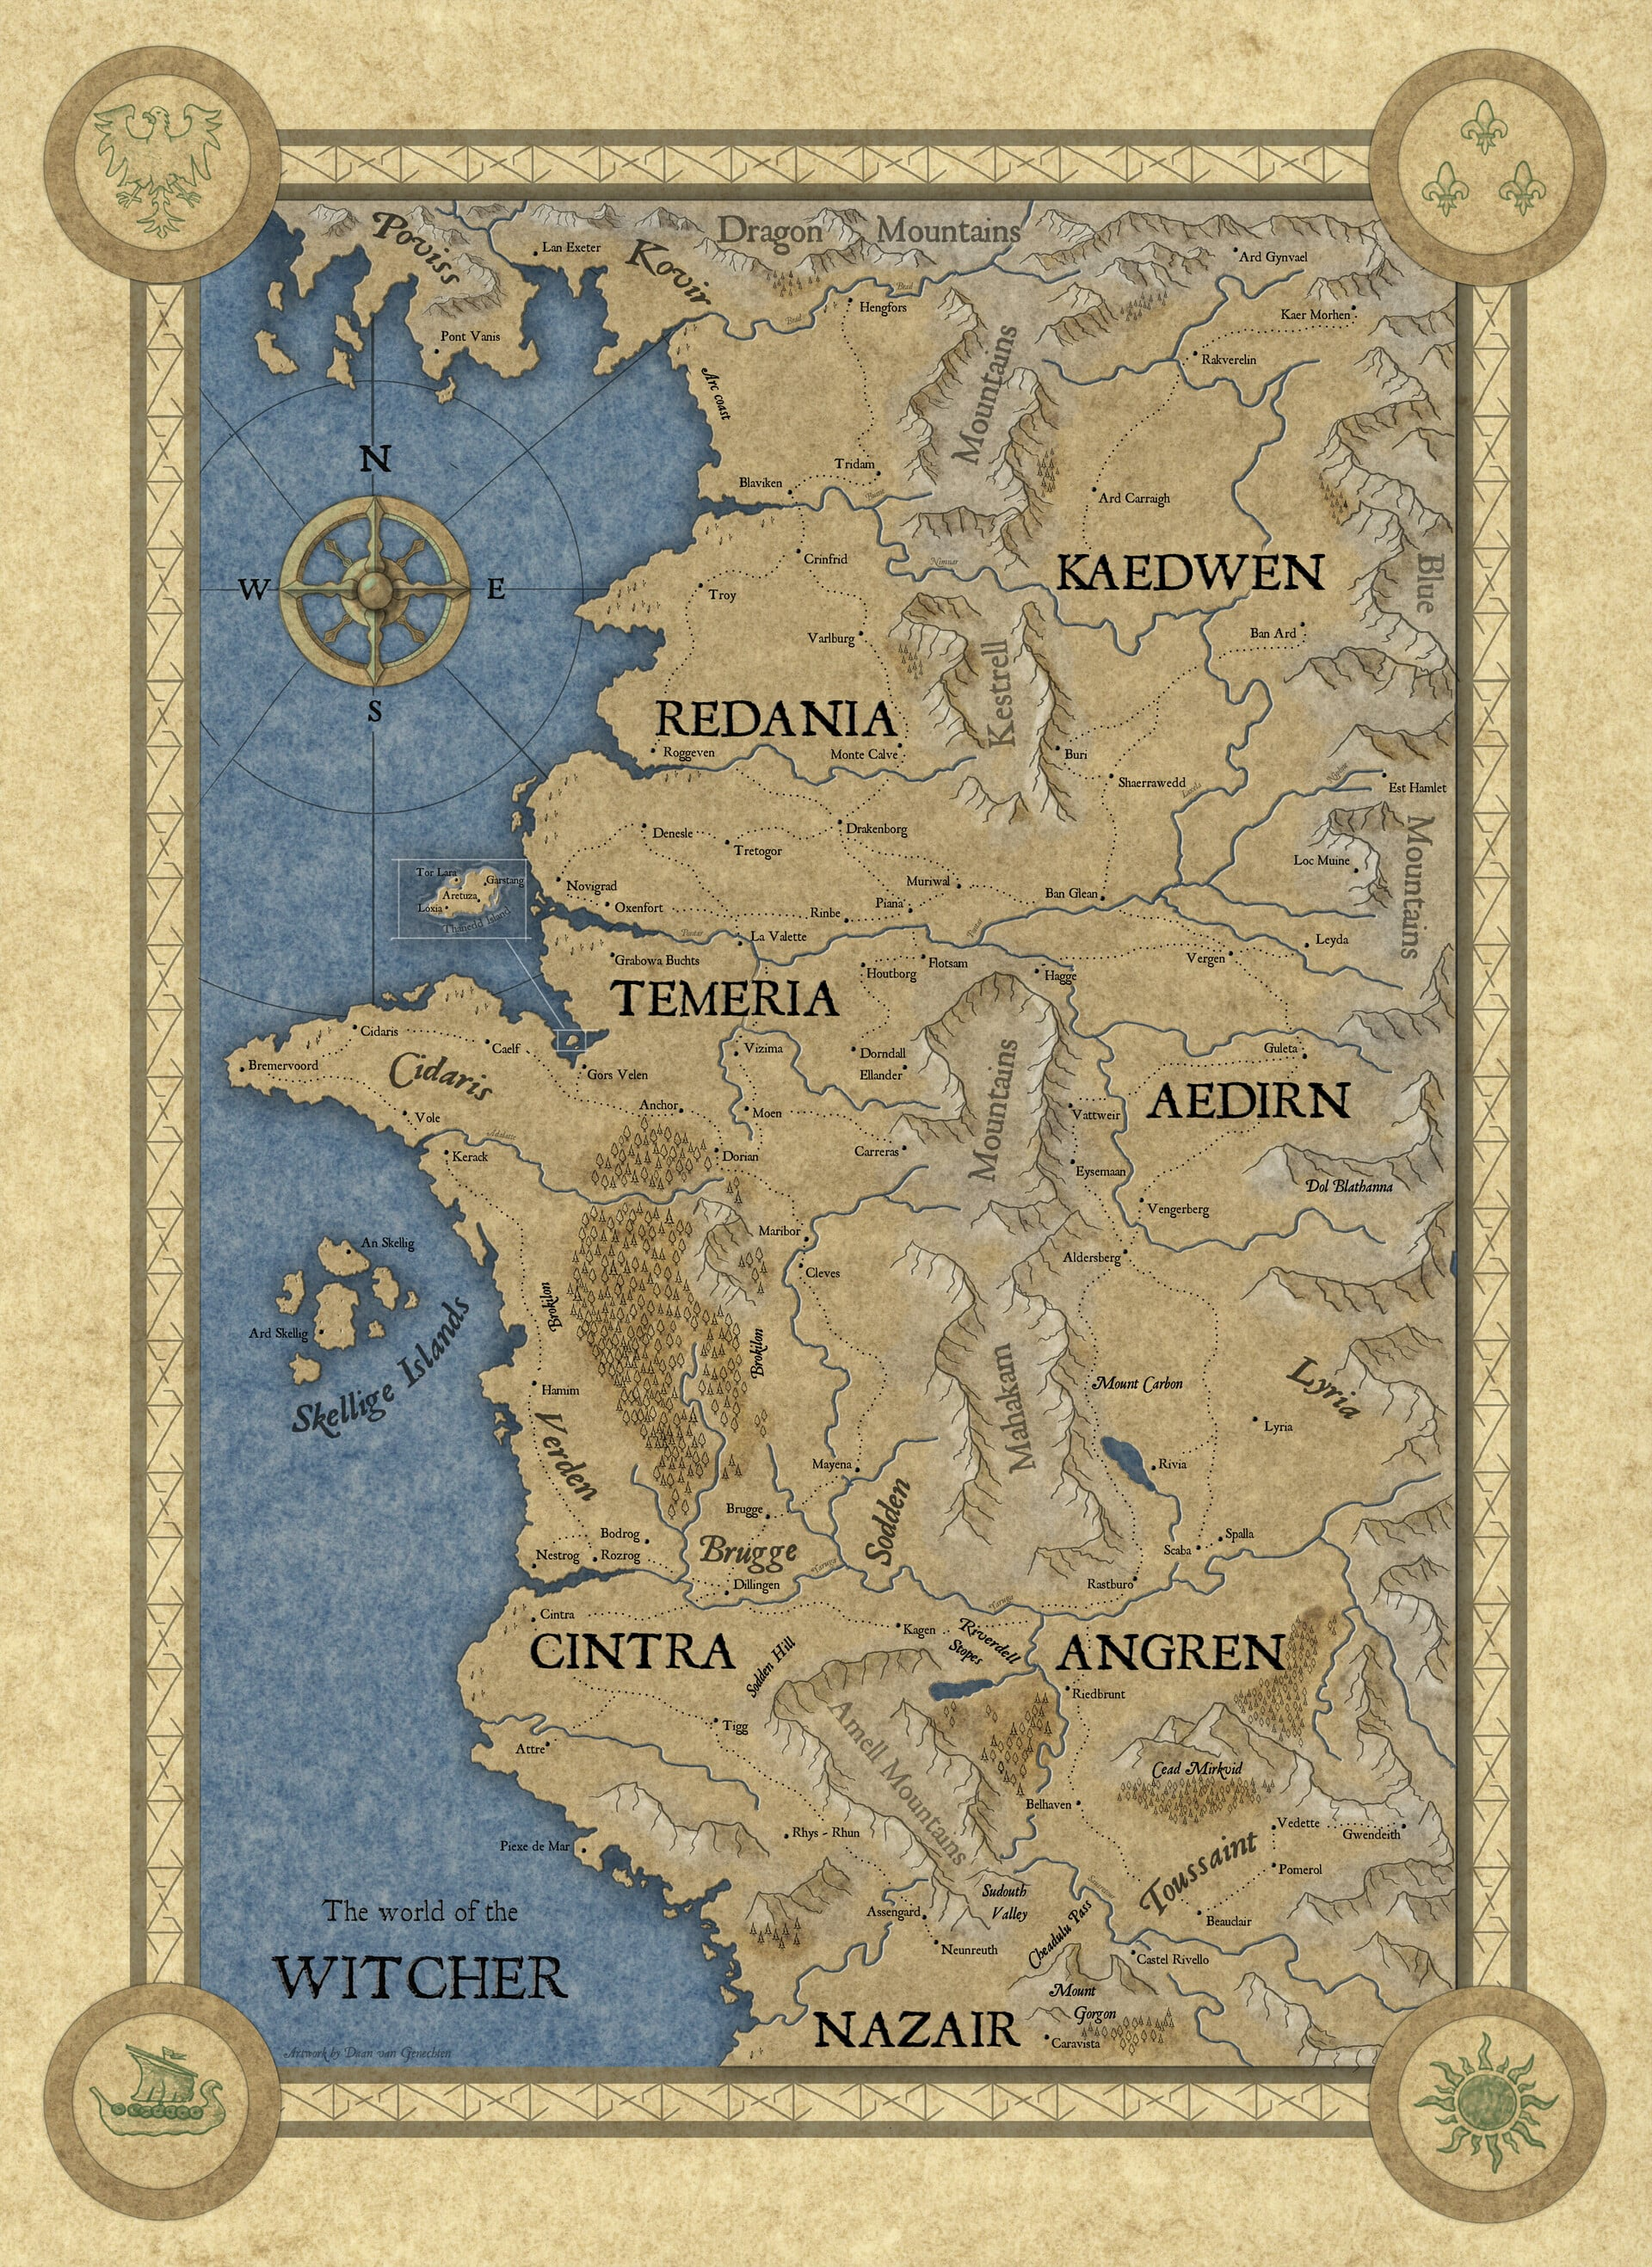
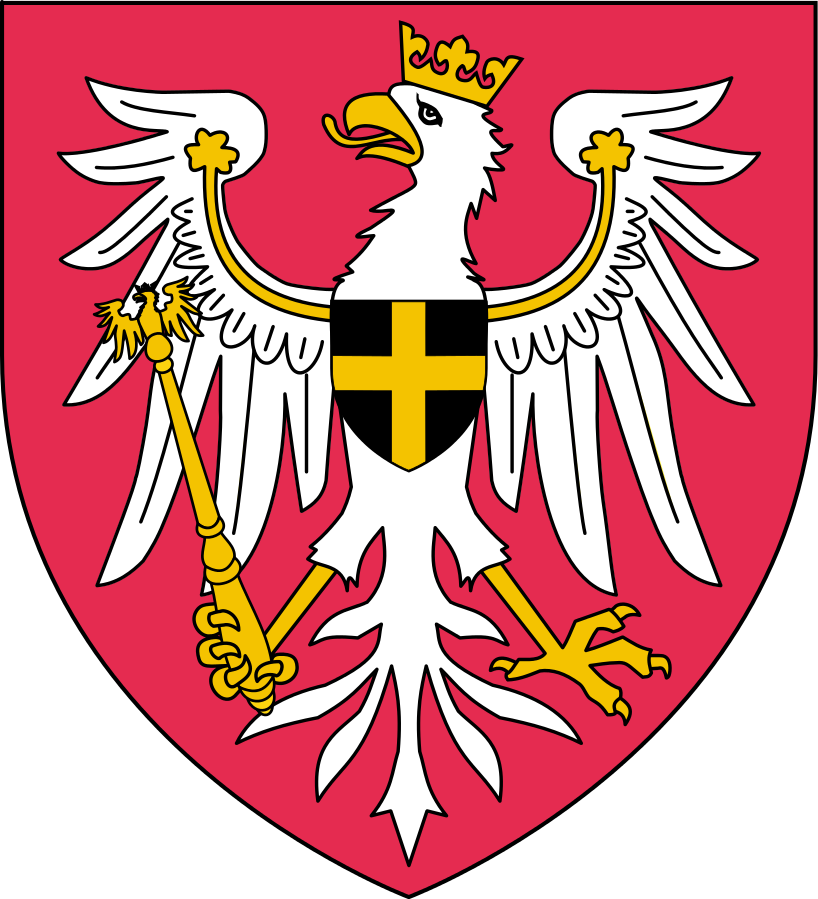
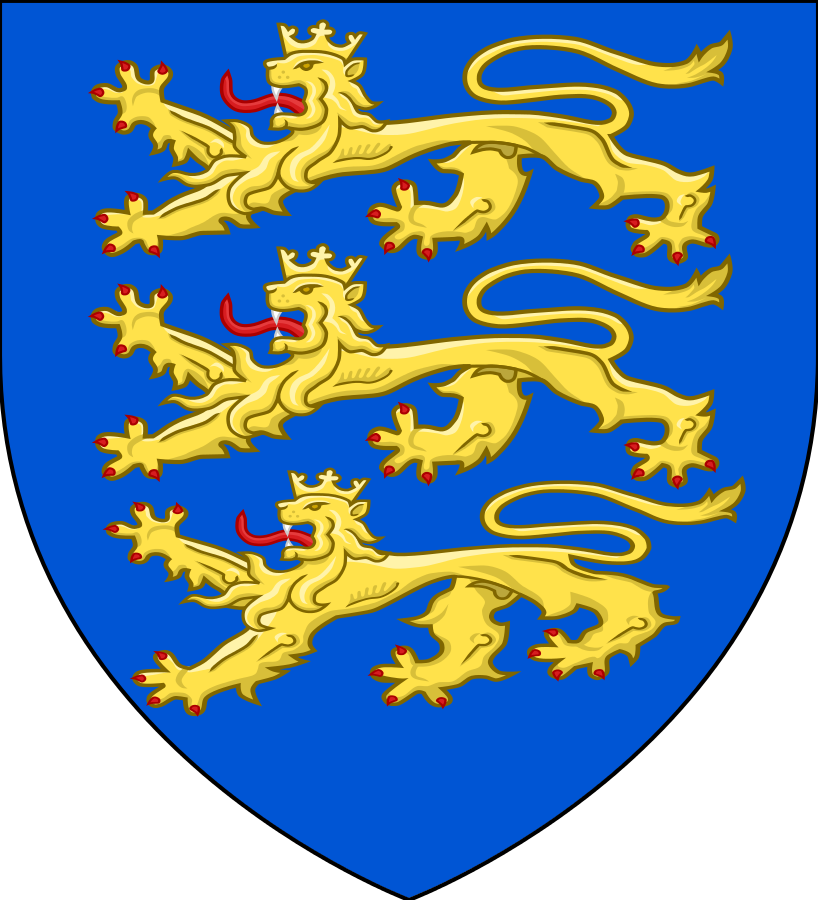
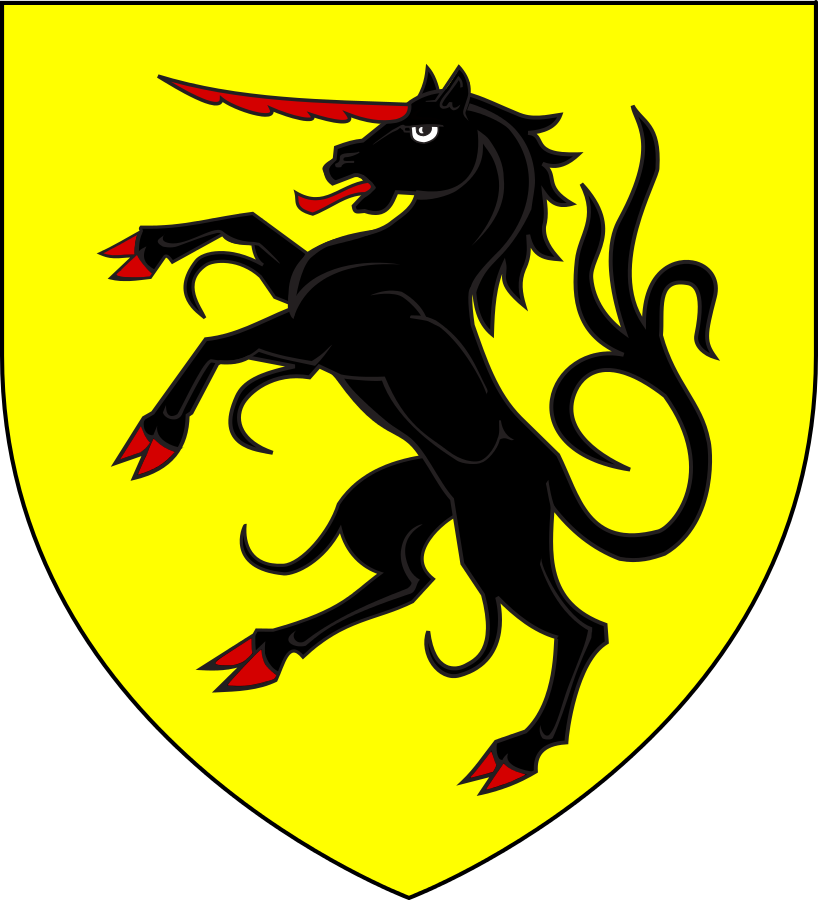
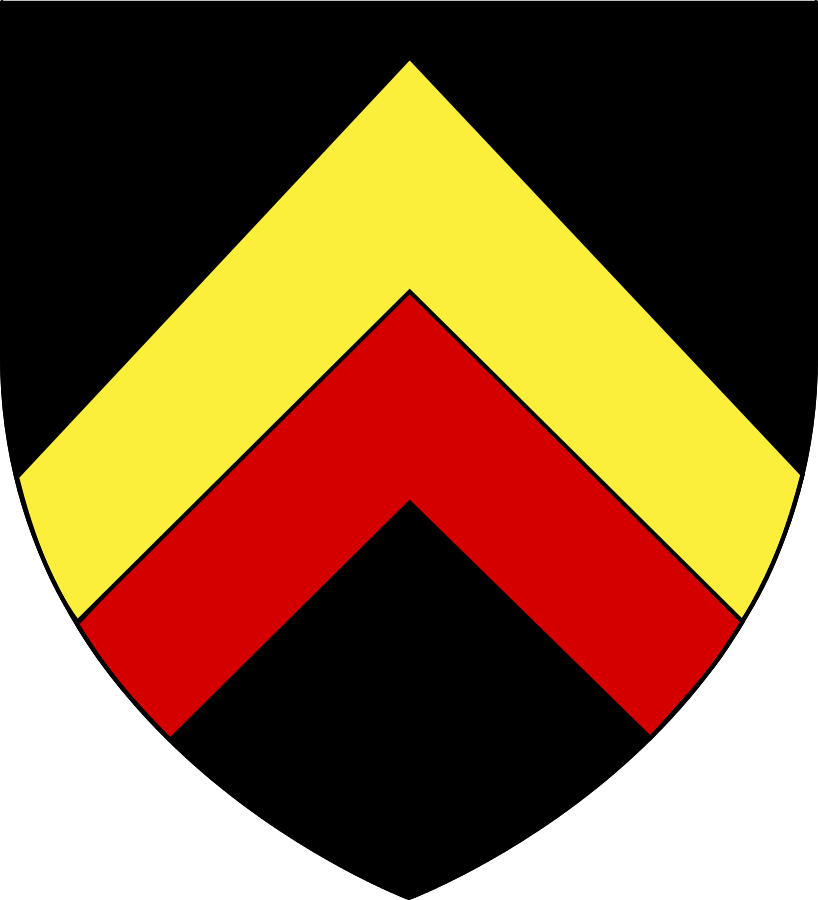
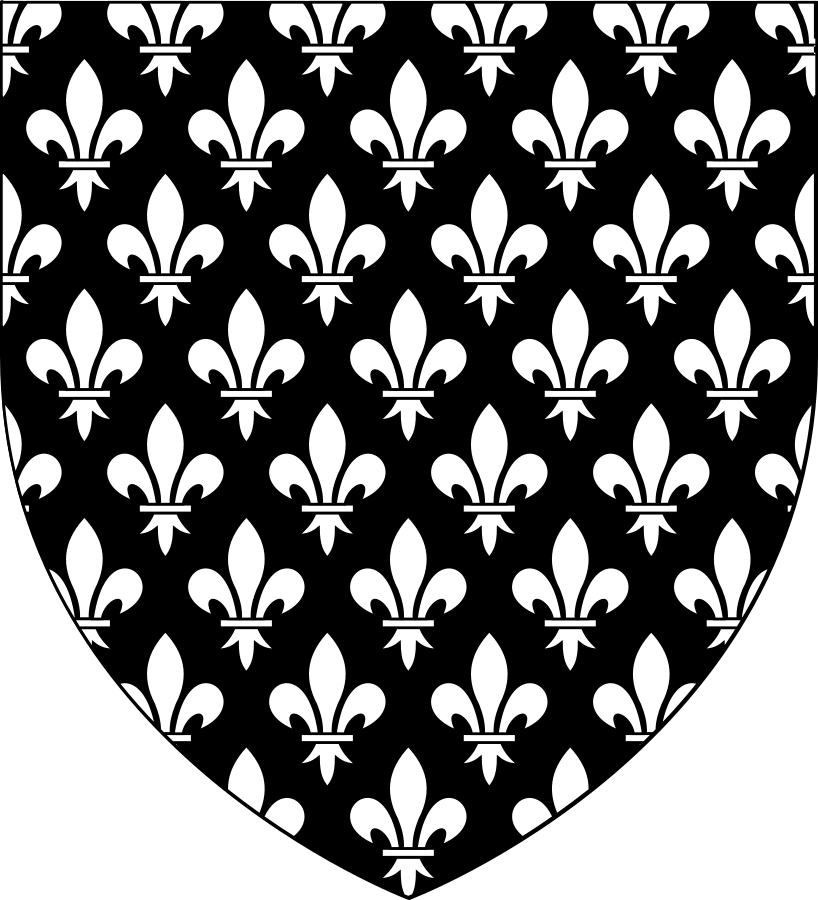
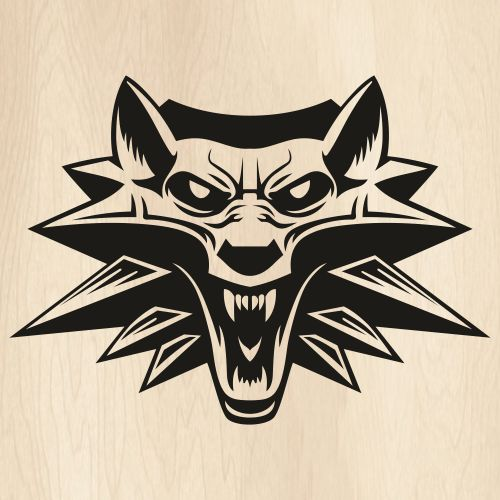
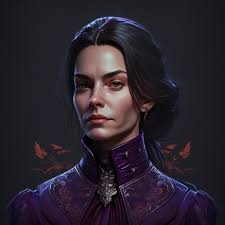

In [ ]:
witcher_map